<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reset -f

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
# Required Libraries
# For Data Manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
# For Splitting Data into Training & Testing Sets
from sklearn.model_selection import train_test_split
# For stratified k-fold partitions
from sklearn.model_selection import StratifiedKFold
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import HistGradientBoostingClassifier

#from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
#from sklearn.impute import SimpleImputer # For Imputation of Missing Data
#from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data

In [4]:
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [6]:
# Read data from google drive
df=pd.read_csv('/gdrive/MyDrive/Colab_data_files/drHarshVardhan/airways_mod_ver4.csv')
df.head()
df.describe()

,age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lahane
0,22,male,172,1,0,1,0.0,22.40,17.0,8.6,2,0,1
1,55,female,143,1,0,1,0.0,27.45,16.0,7.8,2,0,0
2,59,male,162,2,1,0,1.0,24.20,14.3,6.9,3,0,2
3,48,female,168,1,0,0,0.0,28.50,15.6,7.2,3,0,1
4,51,female,154,3,0,0,1.0,25.30,14.3,6.7,4,1,3


,age,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lahane
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,998.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,43.498000,163.035000,0.206000,0.104000,0.259000,0.173347,23.895350,16.935400,8.101800,1.9100,0.010000,0.826000
std,11.742823,11.470804,0.491738,0.305413,0.440583,0.378737,3.869877,1.592276,0.919566,0.6902,0.099549,0.714307
min,20.000000,132.000000,0.000000,0.000000,0.000000,0.000000,13.800000,12.500000,5.600000,1.0000,0.000000,0.000000
25%,34.000000,155.000000,0.000000,0.000000,0.000000,0.000000,21.400000,16.000000,7.500000,1.0000,0.000000,0.000000
50%,45.000000,163.000000,0.000000,0.000000,0.000000,0.000000,24.000000,17.000000,8.000000,2.0000,0.000000,1.000000
75%,54.000000,171.000000,0.000000,0.000000,1.000000,0.000000,26.525000,18.000000,8.600000,2.0000,0.000000,1.000000
max,64.000000,195.000000,3.000000,1.000000,2.000000,1.000000,37.000000,22.000000,11.000000,4.0000,1.000000,3.000000


In [7]:
# Remove leading/trailing spaces
df.columns = df.columns.str.strip()
# Within a col name keep single space
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)  # Replaces multiple spaces with a single space
df.head()

,age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lahane
0,22,male,172,1,0,1,0.0,22.40,17.0,8.6,2,0,1
1,55,female,143,1,0,1,0.0,27.45,16.0,7.8,2,0,0
2,59,male,162,2,1,0,1.0,24.20,14.3,6.9,3,0,2
3,48,female,168,1,0,0,0.0,28.50,15.6,7.2,3,0,1
4,51,female,154,3,0,0,1.0,25.30,14.3,6.7,4,1,3


In [8]:
# Map 'male' and 'female' to 0 and 1

df['sex'].value_counts()

mappings = {
            'female': 0,
            'male': 1
           }

df['sex'] = df['sex'].map(mappings)

df['sex'].value_counts()


,count
sex,
female,535
male,465


,count
sex,
0,535
1,465


In [9]:
# Distribution of target values
# Are classes balanced?
df['cormack lahane'].value_counts()

,count
cormack lahane,
1,559
0,324
2,84
3,33


In [10]:
cat_features = ['sex', 'buck teeth', 'edentulous', 'mallampatti', 'mouth opening', 'subluxation of mandible', 'head and neck movement', 'cormack lahane']
num_features = ["age", "height", "bmi", "sternomental distance", "thyromental distance"]
# Select categorical and numerical columns
df_cat = df[cat_features]
df_num = df[num_features]
df_cat.nunique()
df_cat.head()


,0
sex,2
buck teeth,3
edentulous,2
mallampatti,4
mouth opening,2
subluxation of mandible,4
head and neck movement,2
cormack lahane,4


,sex,buck teeth,edentulous,mallampatti,mouth opening,subluxation of mandible,head and neck movement,cormack lahane
0,1,1,0.0,2,0,1,0,1
1,0,1,0.0,2,0,1,0,0
2,1,0,1.0,3,0,2,1,2
3,0,0,0.0,3,0,1,0,1
4,0,0,1.0,4,1,3,0,3


In [11]:
# prompt: Using dataframe df_cat: transform all features to 'category'

# Convert all columns to 'category' dtype
for col in cat_features:
    df[col] = df[col].astype('category')

# Display the updated data types
df.dtypes


,0
age,int64
sex,category
height,int64
subluxation of mandible,category
head and neck movement,category
buck teeth,category
edentulous,category
bmi,float64
sternomental distance,float64
thyromental distance,float64


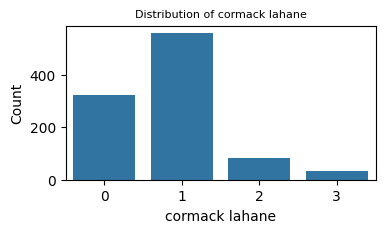

In [12]:
_=plt.figure(figsize=(4, 2))
_=sns.countplot(x='cormack lahane', data=df)
_=plt.title('Distribution of cormack lahane', fontsize = 8)
_=plt.xlabel('cormack lahane')
_=plt.ylabel('Count')
_=plt.show()


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      1000 non-null   int64   
 1   sex                      1000 non-null   category
 2   height                   1000 non-null   int64   
 3   subluxation of mandible  1000 non-null   category
 4   head and neck movement   1000 non-null   category
 5   buck teeth               1000 non-null   category
 6   edentulous               998 non-null    category
 7   bmi                      1000 non-null   float64 
 8   sternomental distance    1000 non-null   float64 
 9   thyromental distance     1000 non-null   float64 
 10  mallampatti              1000 non-null   category
 11  mouth opening            1000 non-null   category
 12  cormack lahane           1000 non-null   category
dtypes: category(8), float64(3), int64(2)
memory usage: 48.2 KB


In [16]:
df = df.dropna()
df.shape

(998, 13)

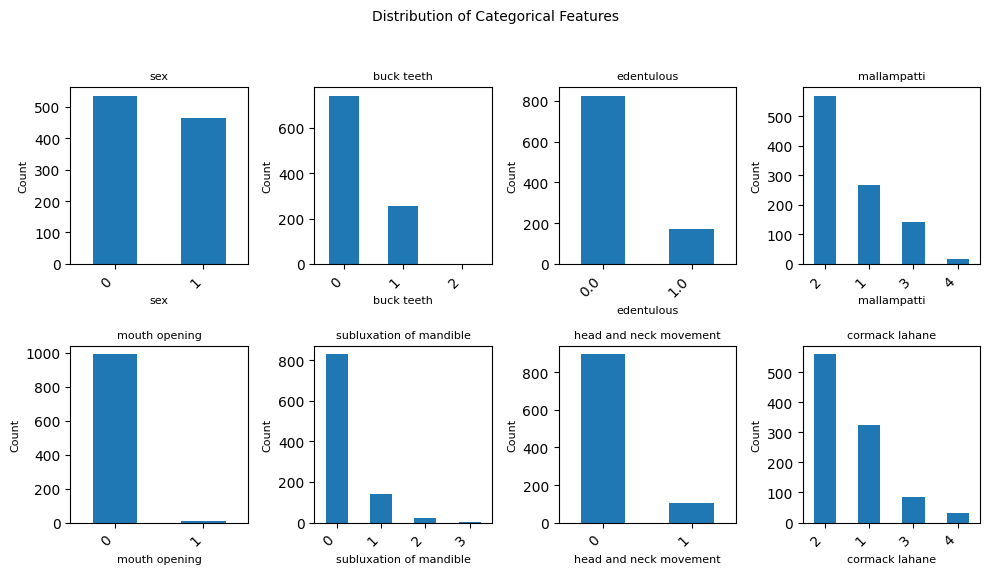

In [ ]:
# prompt: Plot distributions of all features of df_cat in 2 X 4 matrix. Plot graph titles in fontsize of 8 and axis labels also in fontsize of 8. Give overall title as Distribution of Categorical Features

# Assuming df_cat is already defined as in the provided code

fig, axes = plt.subplots(2, 4, figsize=(10, 6))
_=fig.suptitle('Distribution of Categorical Features', fontsize=10)

for i, col in enumerate(df_cat.columns):
    ax = axes[i // 4, i % 4]
    _=df_cat[col].value_counts().plot(kind='bar', ax=ax)
    _=ax.set_title(col, fontsize=8)
    _=ax.set_xlabel(col, fontsize=8)
    _=ax.set_ylabel('Count', fontsize=8)
    _=plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

_=plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_=plt.show()


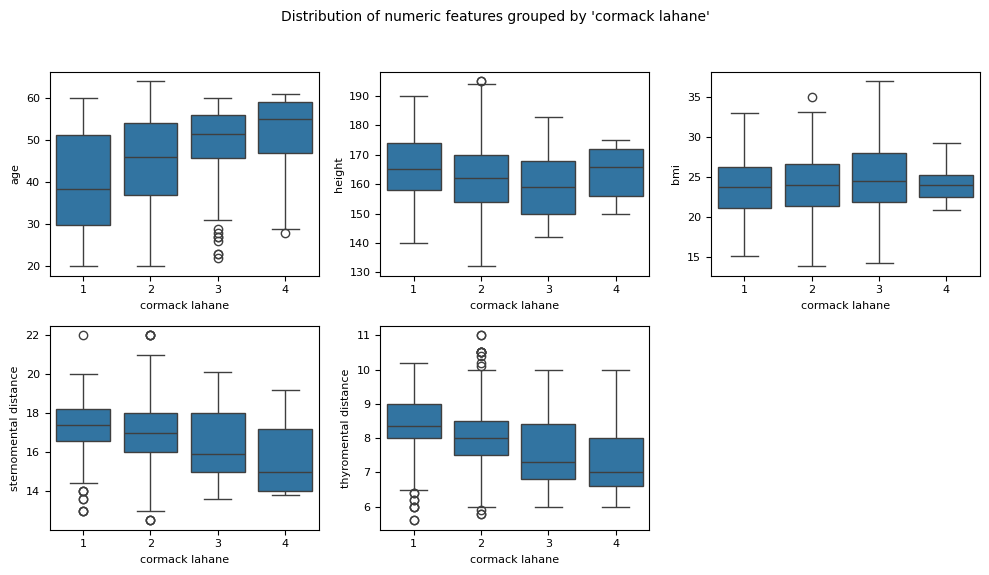

In [ ]:
# prompt: Consider the dataframe df. Draw box plots of all numeric features grouped by 'cormack lahane'. Plot them in a matrix of 2 X 3.. Keep the fontsize of labels to 8. Keep overall title as distribution of numeric features grouped by  'cormack lahane'. Delete the last unused axes


fig, axes = plt.subplots(2, 3, figsize=(10, 6))
_=fig.suptitle("Distribution of numeric features grouped by 'cormack lahane'", fontsize=10)

for i, col in enumerate(df_num.columns):
    ax = axes[i // 3, i % 3]
    _=sns.boxplot(x='cormack lahane', y=col, data=df, ax=ax)
    _=ax.set_xlabel('cormack lahane', fontsize=8)
    _=ax.set_ylabel(col, fontsize=8)
    _=ax.tick_params(axis='x', labelsize=8)
    _=ax.tick_params(axis='y', labelsize=8)


# Delete the last unused axes if necessary (adjust the index based on the number of numeric features)
if len(df_num.columns) < 6:
    for i in range(len(df_num.columns), 6):
      _=axes.flatten()[i].set_visible(False)


_=plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_=plt.show()


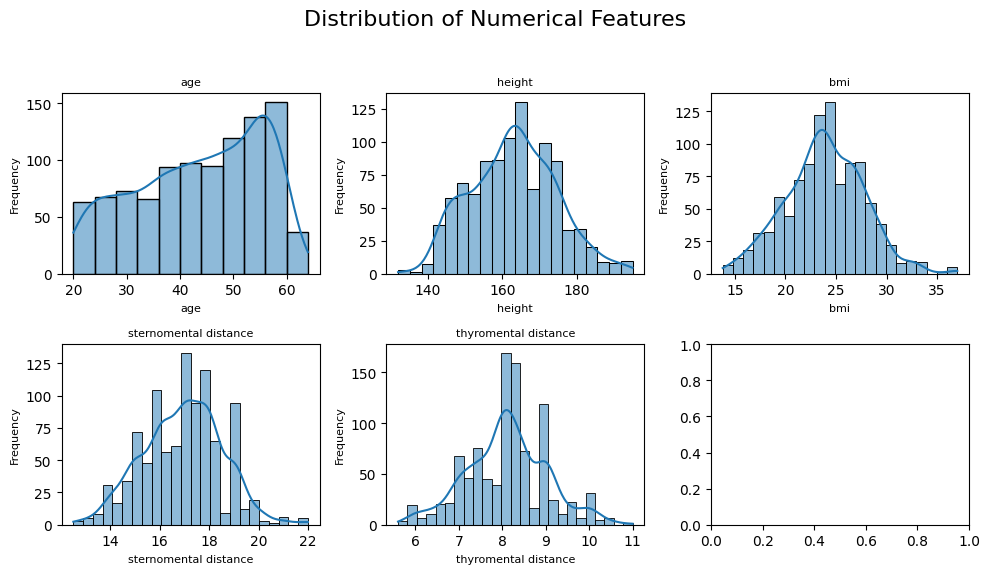

In [ ]:
# prompt: Plot distribution of all features of df_num. But do not show the last  plot ie the sixth with no data ie do not show even its axis

import matplotlib.pyplot as plt
# Assuming df_num is already defined as in the provided code

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
_=fig.suptitle('Distribution of Numerical Features', fontsize=16)

for i, col in enumerate(df_num.columns):
    if i < 5:  # Skip the sixth plot
        ax = axes[i // 3, i % 3]
        _=sns.histplot(df_num[col], ax=ax, kde=True) # Use histplot for better visualization
        _=ax.set_title(col, fontsize=8)
        _=ax.set_xlabel(col, fontsize=8)
        _=ax.set_ylabel('Frequency', fontsize=8)
    elif i==5:
        ax = axes[-1,-1]
        #ax = axes[i // 3, i % 3]
        #ax.axes.set_visible(False)
        ax.axis('off') # Hide the axis of the sixth plot
        ax.axes.flatten()[i].set_visible(False)



_=plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_=plt.show()


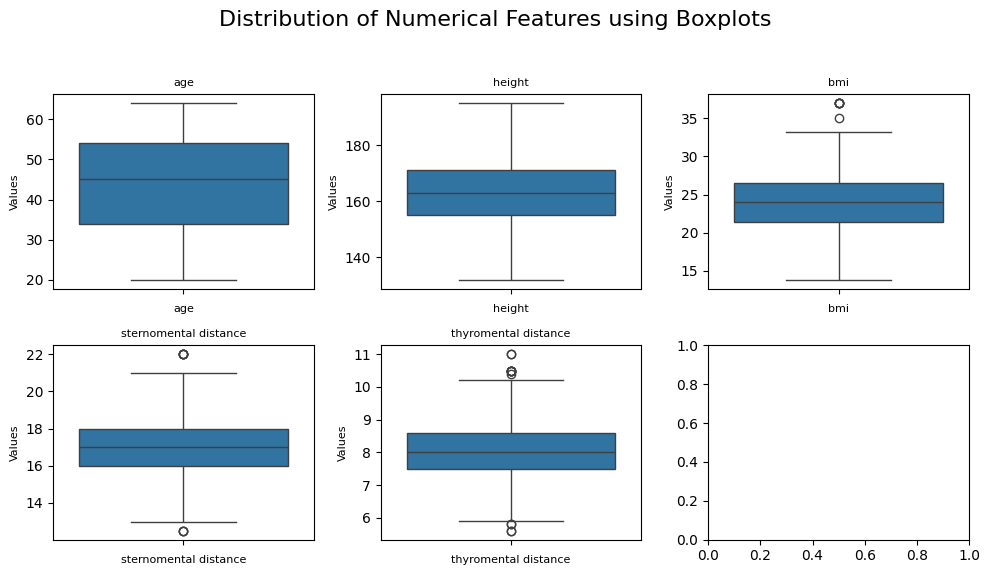

In [ ]:
# prompt: Plot distribution of all features of df_num using boxplots.

import matplotlib.pyplot as plt
# Assuming df_num is already defined as in the provided code

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
_=fig.suptitle('Distribution of Numerical Features using Boxplots', fontsize=16)

for i, col in enumerate(df_num.columns):
    if i < 5:  # Skip the sixth plot
        ax = axes[i // 3, i % 3]
        _=sns.boxplot(y=df_num[col], ax=ax) # Use boxplot for distribution
        _=ax.set_title(col, fontsize=8)
        _=ax.set_xlabel(col, fontsize=8)
        _=ax.set_ylabel('Values', fontsize=8)
    elif i==5:
        ax = axes[-1,-1]
        ax.axes.set_visible(False)
        ax.axis('off') # Hide the axis of the sixth plot

_=plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_=plt.show()


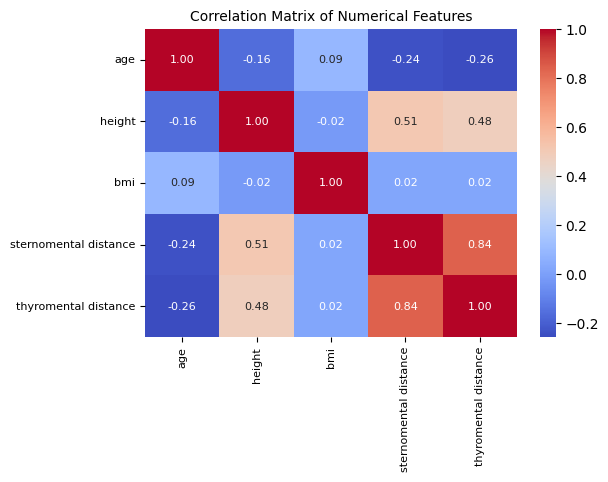

In [ ]:
# prompt: Write a program to visualize the correlation in df_num features and keep fontsize of labels be 8

_=plt.figure(figsize=(6, 4))
_=sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 8})
_=plt.title('Correlation Matrix of Numerical Features', fontsize=10)
_=plt.xticks(fontsize=8)
_=plt.yticks(fontsize=8)
_=plt.show()


<Axes: xlabel='sternomental distance', ylabel='age'>

<Axes: xlabel='sternomental distance', ylabel='age'>

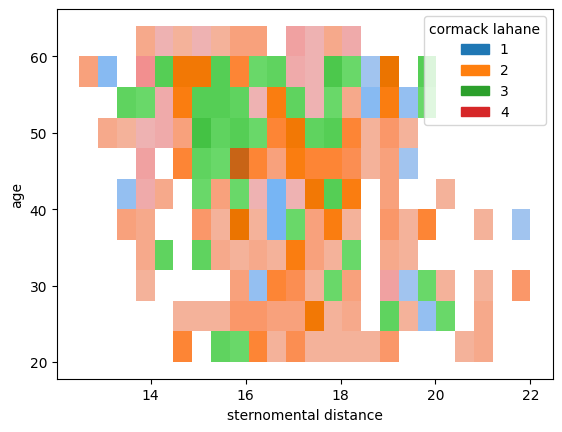

In [ ]:
sns.histplot(df_num, x="sternomental distance", y="age")
sns.histplot(df, x="sternomental distance", y="age", hue = 'cormack lahane')


In [ ]:
sum(df['thyromental distance'].notna() > 60)

0

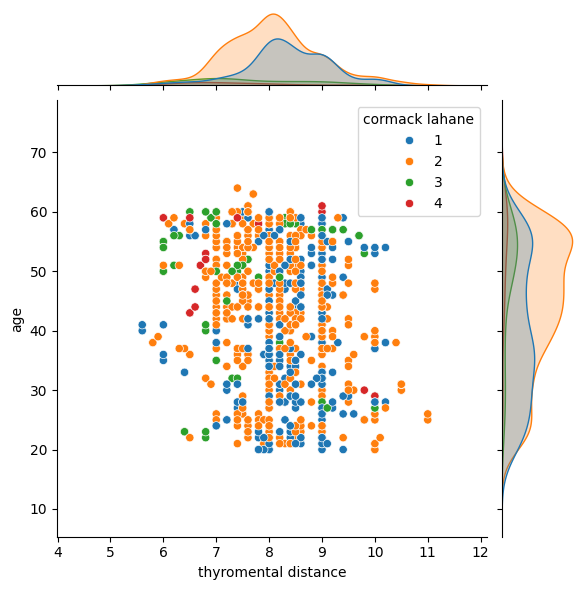

In [ ]:
dx = df[df['thyromental distance'] < 60]
sns.jointplot(data=dx, x="thyromental distance", y="age", hue = 'cormack lahane')

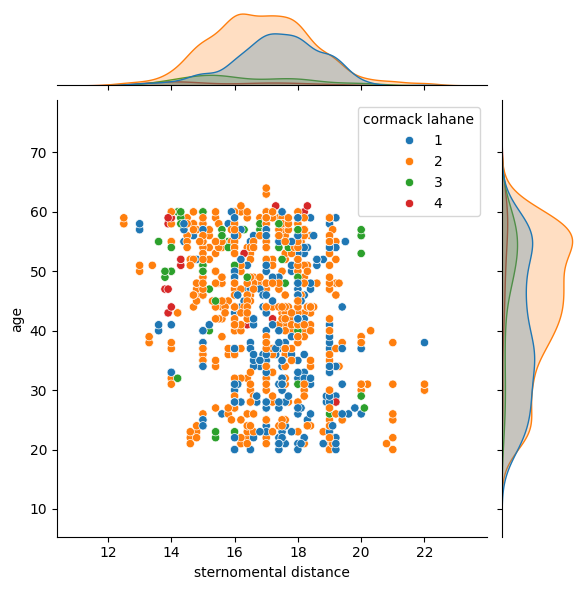

In [ ]:
sns.jointplot(data=df, x="sternomental distance", y="age", hue = 'cormack lahane', palette= "tab10")

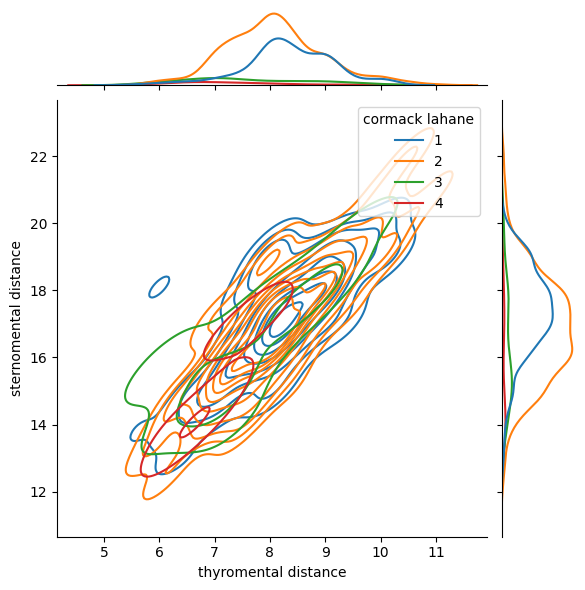

In [ ]:
dx = df[df['thyromental distance'] < 60]
ax = sns.jointplot(data=dx, x="thyromental distance",
              y="sternomental distance",
              hue = 'cormack lahane',
              kind = "kde",
              palette= "tab10")




In [ ]:
df.isna().sum()


,0
age,0
sex,0
height,0
subluxation of mandible,0
head and neck movement,0
buck teeth,0
edentulous,2
bmi,0
sternomental distance,0
thyromental distance,0


In [ ]:
"""
# 1.3. Missing Data Treatment--amended

# 1.3.1 Impite Missing Categorical Data [Nominal | Ordinal] using Descriptive Statistics : Central Tendance (Mode)

# Dataset Used : df_cat_mde

si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
si_cat_transformed = si_cat.fit_transform(df_cat)
df_cat = pd.DataFrame(si_cat_transformed, columns=df_cat.columns)
df_cat.head()
"""

"\n# 1.3. Missing Data Treatment--amended\n\n# 1.3.1 Impite Missing Categorical Data [Nominal | Ordinal] using Descriptive Statistics : Central Tendance (Mode)\n\n# Dataset Used : df_cat_mde\n\nsi_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')\nsi_cat_transformed = si_cat.fit_transform(df_cat)\ndf_cat = pd.DataFrame(si_cat_transformed, columns=df_cat.columns)\ndf_cat.head()\n"

In [ ]:
"""
from sklearn.impute import SimpleImputer

# 1.3.2.1 Impute missing Non-categorical data using descriptive statistical: central tendency
# Dataset used: df_noncat_mde

# Create a SimpleImputer with the 'most_frequent' strategy
si_noncat = SimpleImputer(missing_values=np.nan, strategy='median')

# Fit and transform the data
si_noncat_transformed = si_noncat.fit_transform(df_noncat)
df_noncat = pd.DataFrame(si_noncat_transformed, columns=df_noncat.columns)
df_noncat.head()
"""

"\nfrom sklearn.impute import SimpleImputer\n\n# 1.3.2.1 Impute missing Non-categorical data using descriptive statistical: central tendency\n# Dataset used: df_noncat_mde\n\n# Create a SimpleImputer with the 'most_frequent' strategy\nsi_noncat = SimpleImputer(missing_values=np.nan, strategy='median')\n\n# Fit and transform the data\nsi_noncat_transformed = si_noncat.fit_transform(df_noncat)\ndf_noncat = pd.DataFrame(si_noncat_transformed, columns=df_noncat.columns)\ndf_noncat.head()\n"

"age", "height", "bmi", "sternomental distance", "thyromental distance"

In [ ]:
"""
df_ppd = df_noncat.join(df_cat)
df_ppd.head()
df_ppd.to_csv('/gdrive/MyDrive/Colab_data_files/drHarshVardhan/df_ppd.csv', index=False)
df_ppd.shape
df_ppd.info()
"""

"\ndf_ppd = df_noncat.join(df_cat)\ndf_ppd.head()\ndf_ppd.to_csv('/gdrive/MyDrive/Colab_data_files/drHarshVardhan/df_ppd.csv', index=False)\ndf_ppd.shape\ndf_ppd.info()\n"

In [ ]:
"""
No preprocessing to OHE
"""

'\nNo preprocessing to OHE\n'

# Random Forest

In [17]:
df_ppd = df

In [18]:
y = df_ppd.pop('cormack lahane')
X = df_ppd
#y = df_ppd['cormack lahane']


In [ ]:
# skip skip
le = LabelEncoder()
y = le.fit_transform(y)

In [20]:
# Splitting the dataset into test & train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [21]:


# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train,y_train)
# Accuracy score
rf_classifier.score(X_test, y_test)

RandomForestClassifier(random_state=42)

0.9

In [22]:
# Calculate the train and test scores
train_score = rf_classifier.score(X_train,y_train)
test_score = rf_classifier.score(X_test,y_test)

# Print the train and test scores
print("Train Score {:.2f} & Test Score {:.2f}".format(train_score, test_score))

Train Score 1.00 & Test Score 0.90


In [23]:
rf_predictions = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\n Random Forest Accuracy:", rf_accuracy)


 Random Forest Accuracy: 0.9


In [24]:
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        65
           1       0.88      0.95      0.91       112
           2       1.00      0.65      0.79        17
           3       1.00      0.50      0.67         6

    accuracy                           0.90       200
   macro avg       0.95      0.75      0.82       200
weighted avg       0.91      0.90      0.90       200



In [25]:
# Get feature importances
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame to store feature importance along with feature names
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance"
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                    Feature  Importance
7                       bmi    0.183314
0                       age    0.152043
2                    height    0.151172
8     sternomental distance    0.143005
9      thyromental distance    0.136793
10              mallampatti    0.093222
3   subluxation of mandible    0.036163
5                buck teeth    0.032756
1                       sex    0.027972
6                edentulous    0.023124
4    head and neck movement    0.015368
11            mouth opening    0.005070


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='None', ylabel='None'>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features (Random Forest)')

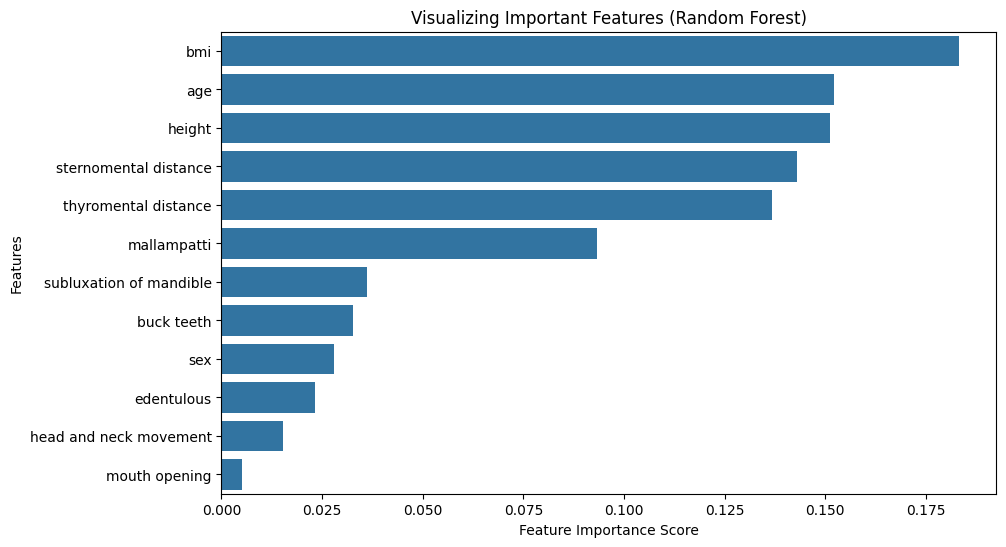

In [26]:
# Create a Series for feature importance with corresponding feature names
feature_imp = pd.Series(rf_classifier.feature_importances_, index=X_test.columns).sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features (Random Forest)")
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rf_classifier, X_test, y_test,
                           n_repeats=40,
                           random_state=0)



In [ ]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df_ppd.columns[i]:<13}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

mallampatti  0.148 +/- 0.019
age          0.106 +/- 0.022
bmi          0.097 +/- 0.015
height       0.081 +/- 0.018
thyromental distance0.071 +/- 0.013
sternomental distance0.071 +/- 0.015
buck teeth   0.040 +/- 0.011
sex          0.027 +/- 0.011
edentulous   0.016 +/- 0.007


In [27]:
# REf: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html

def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    # `labels` argument in boxplot is deprecated in matplotlib 3.9 and has been
    # renamed to `tick_labels`. The following code handles this, but as a
    # scikit-learn user you probably can write simpler code by using `labels=...`
    # (matplotlib < 3.9) or `tick_labels=...` (matplotlib >= 3.9).
    tick_labels_parameter_name = (
        "tick_labels"
            )
    tick_labels_dict = {tick_labels_parameter_name: X.columns[perm_sorted_idx]}
    ax.boxplot(result.importances[perm_sorted_idx].T, vert=False, **tick_labels_dict)
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

<Axes: >

Text(0.5, 0, 'Gini importance')

<Axes: >

Text(0.5, 0, 'Decrease in accuracy score')

Text(0.5, 0.98, 'Impurity-based vs. permutation importances on multicollinear features (test set)')

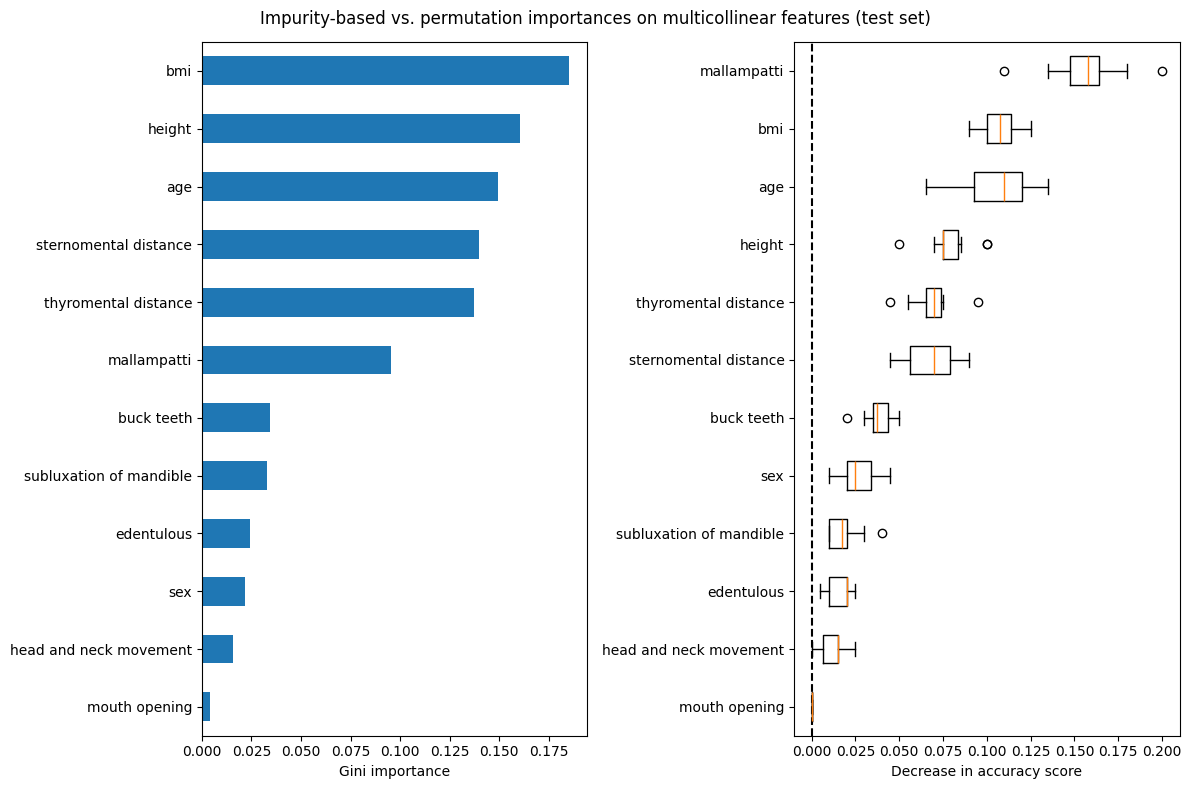

In [ ]:
mdi_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(rf_classifier.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(rf_classifier, X_test, y_test, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (test set)"
)
_ = fig.tight_layout()

In [ ]:
# https://scikit-learn.org/stable/modules/permutation_importance.html
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py
from sklearn.inspection import permutation_importance
rt = permutation_importance(rf_classifier, X_train, y_train,
                           n_repeats=40,
                           random_state=0)

In [ ]:
for i in rt.importances_mean.argsort()[::-1]:
    if rt.importances_mean[i] - 2 * rt.importances_std[i] > 0:
        print(f"{df_ppd.columns[i]:<13}"
              f"{rt.importances_mean[i]:.3f}"
              f" +/- {rt.importances_std[i]:.3f}")

mallampatti  0.166 +/- 0.011
age          0.139 +/- 0.010
bmi          0.094 +/- 0.008
thyromental distance0.081 +/- 0.007
sternomental distance0.075 +/- 0.006
height       0.073 +/- 0.006
buck teeth   0.030 +/- 0.004
sex          0.014 +/- 0.003
subluxation of mandible0.009 +/- 0.003
head and neck movement0.008 +/- 0.002
edentulous   0.008 +/- 0.002


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='None', ylabel='None'>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features (Random Forest)')

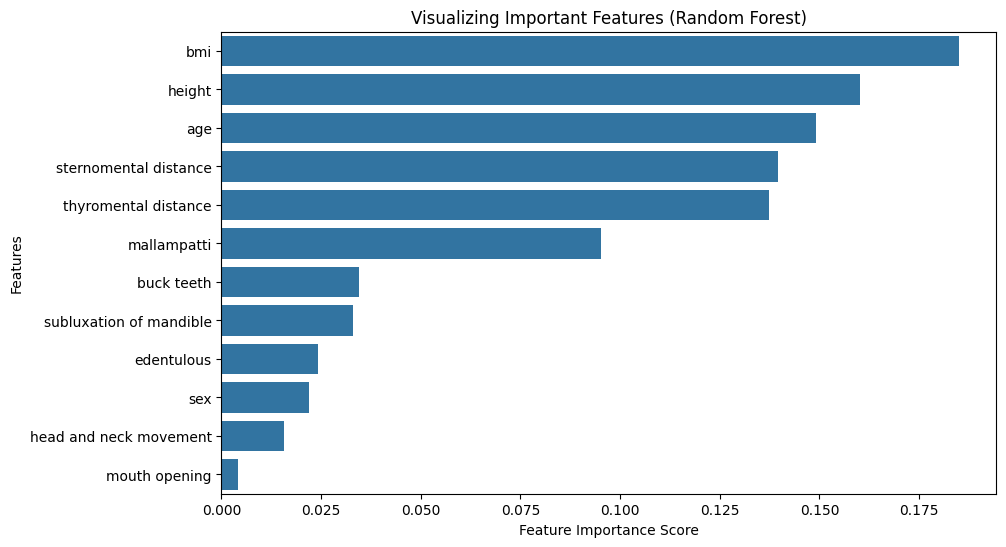

In [ ]:
# Create a Series for feature importance with corresponding feature names
feature_imp = pd.Series(rf_classifier.feature_importances_, index=X_test.columns).sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features (Random Forest)")
plt.show()

In [28]:

categorical_features = df_cat.columns[:-1]
hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 min_samples_leaf = 15,
                                                 l2_regularization = 10,
                                                 categorical_features = 'from_dtype' ,
                                                 learning_rate = 0.1,
                                                 #class_weight = 'balanced'
                                                 ).fit(X_train, y_train)



hist_classifier.score(X_test, y_test)


0.91

In [30]:
scores = cross_val_score(hist_classifier, X, y, cv=5)
scores
scores.mean()

array([0.935     , 0.905     , 0.905     , 0.88944724, 0.89447236])

np.float64(0.90578391959799)

In [ ]:
from sklearn.inspection import permutation_importance
rh = permutation_importance(hist_classifier, X_test, y_test,
                           n_repeats=30,
                           random_state=0)



In [ ]:
for i in rh.importances_mean.argsort()[::-1]:
    if rh.importances_mean[i] - 2 * rh.importances_std[i] > 0:
        print(f"{df_ppd.columns[i]:<13}"
              f"{rh.importances_mean[i]:.3f}"
              f" +/- {rh.importances_std[i]:.3f}")

bmi          0.170 +/- 0.020
mallampatti  0.154 +/- 0.022
height       0.134 +/- 0.015
age          0.108 +/- 0.017
thyromental distance0.107 +/- 0.017
sternomental distance0.085 +/- 0.016
buck teeth   0.031 +/- 0.009
sex          0.026 +/- 0.009
head and neck movement0.021 +/- 0.005


In [ ]:
df.columns

Index(['age', 'sex', 'height', 'subluxation of mandible',
       'head and neck movement', 'buck teeth', 'edentulous', 'bmi',
       'sternomental distance', 'thyromental distance', 'mallampatti',
       'mouth opening'],
      dtype='object')

In [36]:
%%time
# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits

import pandas as pd
from sklearn.model_selection import StratifiedKFold
import time

# Assuming X and y are defined as in your previous code
# X = df_ppd.drop('cormack lahane', axis=1)
# y = df_ppd['cormack lahane']

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=42)

hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 #min_samples_leaf = 10,
                                                 #l2_regularization = 5,
                                                 categorical_features = 'from_dtype' ,
                                                 learning_rate = 0.1,
                                                 #class_weight = 'balanced'
                                                 )

start = time.time()
list_accu_stratified = []
count = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print("=======")
    print("fold:", count ) ; count = count +1
    print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
    # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
    hist_classifier.fit(X_train, y_train)
    print("Accuracy:", hist_classifier.score(X_test, y_test))
    list_accu_stratified.append(hist_classifier.score(X_test, y_test))

print("========")
print("Overall Accuracy:", np.mean(list_accu_stratified))
print("========")


fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.89
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.91
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.905
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9195979899497487
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.8693467336683417
Overall Accuracy: 0.8987889447236181
CPU times: user 13.5 s, sys: 479 ms, total: 14 s
Wall time: 17.3 s


## Extratrees

In [ ]:
X.dtypes
y.dtypes

,0
age,int64
sex,category
height,int64
subluxation of mandible,category
head and neck movement,category
buck teeth,category
edentulous,category
bmi,float64
sternomental distance,float64
thyromental distance,float64


CategoricalDtype(categories=[1, 2, 3, 4], ordered=False, categories_dtype=int64)

In [37]:

%%time

y= pd.DataFrame(y, columns = ['cormack lahane'])


# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits


# Assuming X and y are defined as in your previous code
# X = df_ppd.drop('cormack lahane', axis=1)
# y = df_ppd['cormack lahane']

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=42)


clf = ExtraTreesClassifier(n_estimators=100,
                           max_depth=None,
                           min_samples_split=2)



start = time.time()
list_accu_stratified = []
count = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print("=======")
    print("fold:", count ) ; count = count +1
    print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
    # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
    clf.fit(X_train, y_train)
    print("Accuracy:", clf.score(X_test, y_test))
    list_accu_stratified.append(clf.score(X_test, y_test))

print("========")
print("Overall Accuracy:", np.mean(list_accu_stratified))
print("========")


fold: 1
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.895
fold: 2
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.915
fold: 3
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.935
fold: 4
X_train shape: (799, 12) y_train shape: (799, 1)
X_test shape: (199, 12) y_test shape: (199, 1)
Accuracy: 0.9045226130653267
fold: 5
X_train shape: (799, 12) y_train shape: (799, 1)
X_test shape: (199, 12) y_test shape: (199, 1)
Accuracy: 0.8844221105527639
Overall Accuracy: 0.9067889447236182
CPU times: user 1.22 s, sys: 4.8 ms, total: 1.23 s
Wall time: 1.25 s


In [38]:

%%time

#y= pd.DataFrame(y, columns = ['cormack lahane'])
#y.head()

# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import time


#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


clf = ExtraTreesClassifier(n_estimators=100,
                           max_depth=None,
                           min_samples_split=2)

total_acc_list = []
count = 1
for i in range(50):
  list_accu_stratified = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True)
  #count = 1
  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
      clf.fit(X_train, y_train)
      print("Accuracy:", clf.score(X_test, y_test))
      list_accu_stratified.append(clf.score(X_test, y_test))

  total_acc_list.append(list_accu_stratified)





fold: 1
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.9
fold: 2
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.935
fold: 3
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.95
fold: 4
X_train shape: (799, 12) y_train shape: (799, 1)
X_test shape: (199, 12) y_test shape: (199, 1)
Accuracy: 0.9246231155778895
fold: 5
X_train shape: (799, 12) y_train shape: (799, 1)
X_test shape: (199, 12) y_test shape: (199, 1)
Accuracy: 0.8693467336683417
fold: 6
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.905
fold: 7
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.93
fold: 8
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.94
fold: 9
X_train sha

In [39]:
print("========")
acc_array = np.array(total_acc_list)
acc_array.shape  # (50,5)
print("Overall Accuracy:", np.mean(acc_array))
print("Std deviation of accuracy:", np.std(acc_array))
print("========")

(50, 5)

Overall Accuracy: 0.9082352763819096
Std deviation of accuracy: 0.01967383308560114


<Axes: xlabel='accuracy'>

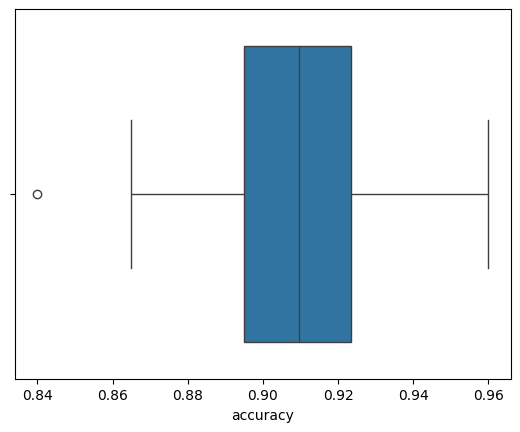

In [40]:
acc = pd.DataFrame(acc_array.flatten(), columns = ["accuracy"])
sns.boxplot(data=acc, x="accuracy")


<Axes: xlabel='accuracy'>

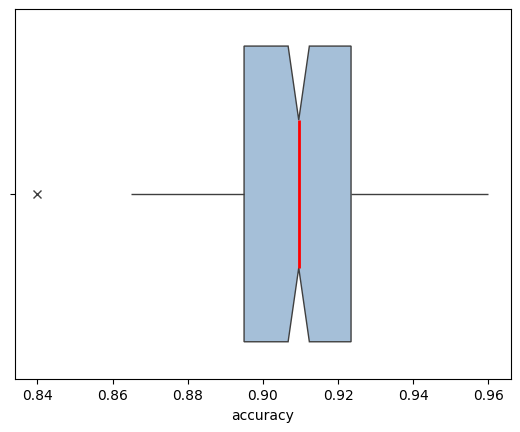

In [41]:
sns.boxplot(
            data=acc, x="accuracy",
            notch=True, showcaps=False,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2},
            )

In [ ]:
X.columns

Index(['age', 'sex', 'height', 'subluxation of mandible',
       'head and neck movement', 'buck teeth', 'edentulous', 'bmi',
       'sternomental distance', 'thyromental distance', 'mallampatti',
       'mouth opening'],
      dtype='object')

In [42]:

%%time

#y= pd.DataFrame(y, columns = ['cormack lahane'])
#y.head()

# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import time


#skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


clf = ExtraTreesClassifier(n_estimators=150,
                           max_depth=None,
                           min_samples_split=2,
                           class_weight = 'balanced',
                           ccp_alpha = 0.0005)

total_acc_list = []
count = 1
for i in range(50):
  list_accu_stratified = []
  #count = 1
  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
      clf.fit(X_train, y_train)
      print("Accuracy:", clf.score(X_test, y_test))
      list_accu_stratified.append(clf.score(X_test, y_test))

  total_acc_list.append(list_accu_stratified)





fold: 1
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.925
fold: 2
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.91
fold: 3
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.85
fold: 4
X_train shape: (799, 12) y_train shape: (799, 1)
X_test shape: (199, 12) y_test shape: (199, 1)
Accuracy: 0.9246231155778895
fold: 5
X_train shape: (799, 12) y_train shape: (799, 1)
X_test shape: (199, 12) y_test shape: (199, 1)
Accuracy: 0.9447236180904522
fold: 6
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.94
fold: 7
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.915
fold: 8
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.94
fold: 9
X_train sh

In [44]:
print("========")
acc_array = np.array(total_acc_list)
acc_array.shape  # (50,5)
print("Overall Accuracy:", np.mean(acc_array))
print("Std deviation of accuracy:", np.std(acc_array))
print("========")

(50, 5)

Overall Accuracy: 0.9066504522613066
Std deviation of accuracy: 0.022417410388761865


<Axes: xlabel='accuracy'>

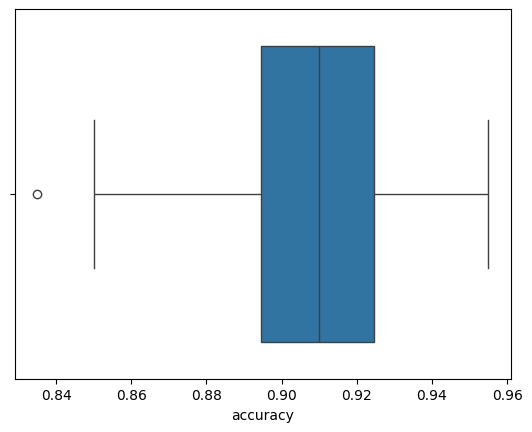

In [45]:
acc = pd.DataFrame(acc_array.flatten(), columns = ["accuracy"])
sns.boxplot(data=acc, x="accuracy")


In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(clf, X_test, y_test,
                           n_repeats=40,
                           random_state=0)



In [ ]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df_ppd.columns[i]:<13}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

mallampatti  0.170 +/- 0.022
age          0.128 +/- 0.020
bmi          0.112 +/- 0.019
thyromental distance0.093 +/- 0.014
sternomental distance0.079 +/- 0.012
height       0.077 +/- 0.015
buck teeth   0.045 +/- 0.011
subluxation of mandible0.023 +/- 0.006
edentulous   0.020 +/- 0.006
head and neck movement0.016 +/- 0.007


In [ ]:
from xgboost import XGBClassifier
# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
bst = XGBClassifier(n_estimators=200,
                    max_depth=7,
                    learning_rate=0.1,
                    objective='binary:logistic',
                    enable_categorical = True)
# fit model
bst.fit(X_train, y_train)
# make predictions
xgb_preds = bst.predict(X_test)
# Calculate the accuracy of the classifier
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print("\n XGBoost:", xgb_accuracy)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


 XGBoost: 0.895


In [49]:
y= pd.DataFrame(y, columns = ['cormack lahane'])
y= y.astype('int64')
y

,cormack lahane
0,1
1,0
2,2
3,1
4,3
...,...
995,0
996,1
997,1
998,1


In [50]:
%%time

from xgboost import XGBClassifier



# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import time


#skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


clf = XGBClassifier(tree_method="hist",
                    n_estimators=200,
                    max_depth=7,
                    learning_rate=0.1,
                    objective='binary:logistic',
                    enable_categorical = True)

total_acc_list = []
count = 1
for i in range(2):
  list_accu_stratified = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True)
  #count = 1
  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
      clf.fit(X_train, y_train)
      print("Accuracy:", clf.score(X_test, y_test))
      list_accu_stratified.append(clf.score(X_test, y_test))
      sk = classification_report(y_test, clf.predict(X_test), output_dict = True)
      print(sk)

  total_acc_list.append(list_accu_stratified)





fold: 1
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.875
{'0': {'precision': 0.8666666666666667, 'recall': 0.8, 'f1-score': 0.832, 'support': 65.0}, '1': {'precision': 0.860655737704918, 'recall': 0.9375, 'f1-score': 0.8974358974358975, 'support': 112.0}, '2': {'precision': 1.0, 'recall': 0.75, 'f1-score': 0.8571428571428571, 'support': 16.0}, '3': {'precision': 1.0, 'recall': 0.8571428571428571, 'f1-score': 0.9230769230769231, 'support': 7.0}, 'accuracy': 0.875, 'macro avg': {'precision': 0.9318306010928962, 'recall': 0.8361607142857143, 'f1-score': 0.8774139194139194, 'support': 200.0}, 'weighted avg': {'precision': 0.8786338797814207, 'recall': 0.875, 'f1-score': 0.8738432234432234, 'support': 200.0}}
fold: 2
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.885
{'0': {'precision': 0.8709677419354839, 'recall': 0.84375, 'f1-score': 0.8571428571428571, 'support': 6

In [51]:
print("========")
acc_array = np.array(total_acc_list)
acc_array.shape  # (50,5)
print("Overall Accuracy:", np.mean(acc_array))
print("Std deviation of accuracy:", np.std(acc_array))
print("========")

(2, 5)

Overall Accuracy: 0.8752562814070352
Std deviation of accuracy: 0.019173882938115925


<Axes: xlabel='accuracy'>

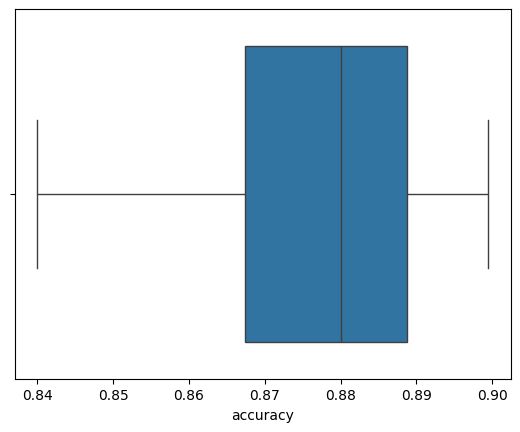

In [52]:
acc = pd.DataFrame(acc_array.flatten(), columns = ["accuracy"])
sns.boxplot(data=acc, x="accuracy")


## Voting classifier

In [55]:
%%time

from sklearn.ensemble import  VotingClassifier



xgb_clf = XGBClassifier(tree_method="hist",
                        n_estimators=200,
                        max_depth=7,
                        learning_rate=0.1,
                        objective='binary:logistic',
                        enable_categorical = True
                        )

extra_clf = ExtraTreesClassifier(n_estimators=150,
                                max_depth=None,
                                min_samples_split=2,
                                #class_weight = 'balanced',
                                #ccp_alpha = 0.0005
                                 )

hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 min_samples_leaf = 15,
                                                 #l2_regularization = 10,
                                                 categorical_features = 'from_dtype' ,
                                                 learning_rate = 0.1,
                                                 class_weight = 'balanced'
                                                 )

rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)


eclf = VotingClassifier(estimators=[('xgb', xgb_clf),
                                    ('hist', hist_classifier),
                                    ('extra', extra_clf),
                                    ('rf', rf_classifier)],
                         voting='soft')



total_acc_list = []
total_class0  = []
total_class1 = []
total_class2 = []
total_class3 = []
count = 1
for i in range(50):
  print("=========")
  print("ITERATION", i)
  print("=========")

  list_accu_stratified = []
  class0  = []    # [['precision', 'recall', 'f1-score', 'support'] ....]
  class1 = []
  class2 = []
  class3 = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True)

  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
      eclf.fit(X_train, y_train)
      print("Accuracy:", eclf.score(X_test, y_test))
      list_accu_stratified.append(eclf.score(X_test, y_test))
      sk = classification_report(y_test, eclf.predict(X_test), output_dict = True)
      class0.append(list(sk['0'].values()))  # [['precision', 'recall', 'f1-score', 'support']...]
      class1.append(list(sk['1'].values()))
      class2.append(list(sk['2'].values()))
      class3.append(list(sk['3'].values()))

  total_acc_list.append(list_accu_stratified)
  total_class0.append(class0)
  total_class1.append(class1)
  total_class2.append(class2)
  total_class3.append(class3)



ITERATION 0
fold: 1
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.89
fold: 2
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.9
fold: 3
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.905
fold: 4
X_train shape: (799, 12) y_train shape: (799, 1)
X_test shape: (199, 12) y_test shape: (199, 1)
Accuracy: 0.8844221105527639
fold: 5
X_train shape: (799, 12) y_train shape: (799, 1)
X_test shape: (199, 12) y_test shape: (199, 1)
Accuracy: 0.8793969849246231
ITERATION 1
fold: 6
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.905
fold: 7
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 0.87
fold: 8
X_train shape: (798, 12) y_train shape: (798, 1)
X_test shape: (200, 12) y_test shape: (200, 1)
Accuracy: 

In [56]:
total_acc_list
#IIndattempt = total_acc_list

[[0.89, 0.9, 0.905, 0.8844221105527639, 0.8793969849246231],
 [0.905, 0.87, 0.875, 0.8743718592964824, 0.8793969849246231],
 [0.91, 0.9, 0.89, 0.9296482412060302, 0.9396984924623115],
 [0.92, 0.855, 0.89, 0.8894472361809045, 0.8994974874371859],
 [0.89, 0.91, 0.865, 0.9296482412060302, 0.8894472361809045],
 [0.85, 0.905, 0.865, 0.914572864321608, 0.8894472361809045],
 [0.895, 0.92, 0.89, 0.8844221105527639, 0.9246231155778895],
 [0.88, 0.885, 0.91, 0.8894472361809045, 0.9045226130653267],
 [0.88, 0.915, 0.87, 0.9095477386934674, 0.8894472361809045],
 [0.905, 0.915, 0.91, 0.8793969849246231, 0.8994974874371859],
 [0.945, 0.92, 0.85, 0.914572864321608, 0.914572864321608],
 [0.895, 0.94, 0.905, 0.8994974874371859, 0.8944723618090452],
 [0.905, 0.875, 0.865, 0.9095477386934674, 0.8844221105527639],
 [0.875, 0.88, 0.895, 0.9195979899497487, 0.8542713567839196],
 [0.91, 0.875, 0.895, 0.9045226130653267, 0.8894472361809045],
 [0.91, 0.88, 0.91, 0.8994974874371859, 0.864321608040201],
 [0.88, 

In [ ]:
Istattempt

In [57]:
print("========")
acc_array = np.array(total_acc_list)
acc_array.shape  # (50,5)
print("Overall Accuracy:", np.mean(acc_array))
print("Std deviation of accuracy:", np.std(acc_array))
print("========")

(50, 5)

Overall Accuracy: 0.8941313567839198
Std deviation of accuracy: 0.02183004241312404


<Axes: xlabel='accuracy'>

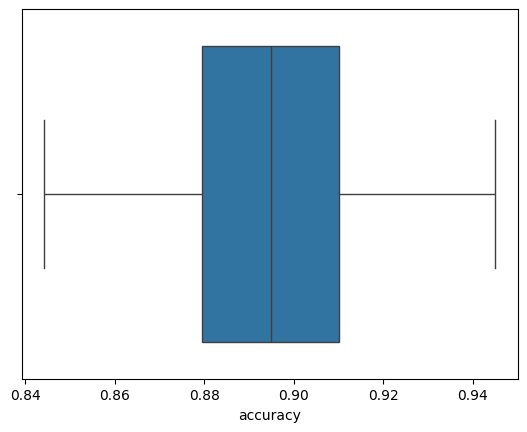

In [58]:
acc = pd.DataFrame(acc_array.flatten(), columns = ["accuracy"])
sns.boxplot(data=acc, x="accuracy")


In [ ]:
###########

In [60]:
%%time

from sklearn.ensemble import StackingClassifier


xgb_clf = XGBClassifier(tree_method="hist",
                        n_estimators=200,
                        max_depth=7,
                        learning_rate=0.1,
                        objective='binary:logistic',
                        enable_categorical = True
                        )

extra_clf = ExtraTreesClassifier(n_estimators=250,
                                max_depth=None,
                                min_samples_split=2,
                                #class_weight = 'balanced',
                                #ccp_alpha = 0.0005
                                 )

hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 #min_samples_leaf = 15,
                                                 l2_regularization = 0.5,
                                                 categorical_features = 'from_dtype' ,
                                                 learning_rate = 0.1,
                                                 #class_weight = 'balanced'
                                                 )

rf_classifier = RandomForestClassifier(n_estimators=200)

sclf = StackingClassifier(estimators=[('xgb', xgb_clf),
                                      ('hist', hist_classifier),
                                       ('extra', extra_clf)],
                         final_estimator=rf_classifier,
                         cv = 5)

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
sclf.fit(X_train, y_train)
print(classification_report(y_test,
                      sclf.predict(X_test),
                      output_dict = True
                      ))

print("Accuracy:", sclf.score(X_test, y_test))


{'0': {'precision': 0.8974358974358975, 'recall': 0.9090909090909091, 'f1-score': 0.9032258064516129, 'support': 77.0}, '1': {'precision': 0.8859060402684564, 'recall': 0.9428571428571428, 'f1-score': 0.9134948096885813, 'support': 140.0}, '2': {'precision': 1.0, 'recall': 0.7083333333333334, 'f1-score': 0.8292682926829268, 'support': 24.0}, '3': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 9.0}, 'accuracy': 0.9, 'macro avg': {'precision': 0.9458354844260884, 'recall': 0.806737012987013, 'f1-score': 0.8614972272057801, 'support': 250.0}, 'weighted avg': {'precision': 0.904517638960592, 'recall': 0.9, 'f1-score': 0.8981603979102633, 'support': 250.0}}
Accuracy: 0.9
CPU times: user 23.1 s, sys: 696 ms, total: 23.8 s
Wall time: 21.8 s


In [ ]:

%%time

#y= pd.DataFrame(y, columns = ['cormack lahane'])
#y.head()

# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import time


#skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


clf = XGBClassifier(tree_method="hist",
                    n_estimators=200,
                    max_depth=7,
                    learning_rate=0.1,
                    objective='binary:logistic',
                    enable_categorical = True)

total_acc_list = []
total_class0  = []
total_class1 = []
total_class2 = []
total_class3 = []
count = 1
for i in range(3):
  list_accu_stratified = []
  class0  = []
  class1 = []
  class2 = []
  class3 = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True)
  #count = 1
  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
      clf.fit(X_train, y_train)
      print("Accuracy:", clf.score(X_test, y_test))
      list_accu_stratified.append(clf.score(X_test, y_test))
      sk = classification_report(y_test, clf.predict(X_test), output_dict = True)
      class0.append(list(sk['0'].values()))   # ['precision', 'recall', 'f1-score', 'support']
      class1.append(list(sk['1'].values()))
      class2.append(list(sk['2'].values()))
      class3.append(list(sk['3'].values()))


  total_acc_list.append(list_accu_stratified)
  total_class0.append(class0)
  total_class1.append(class1)
  total_class2.append(class2)
  total_class3.append(class3)





In [ ]:
###############